#Homework

The goal of this homework is to train a simple model for predicting the duration of a ride - similar to what we did in this module.
Q1. Downloading the data

We'll use the same NYC taxi dataset, but instead of "Green Taxi Trip Records", we'll use "Yellow Taxi Trip Records".

Download the data for January and February 2023.

In [1]:
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet

--2024-05-20 16:10:54--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.238.133, 18.239.238.152, 18.239.238.119, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.238.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M  13.1MB/s    in 4.4s    

2024-05-20 16:10:59 (10.4 MB/s) - ‘yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]

--2024-05-20 16:10:59--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.238.133, 18.239.238.152, 18.239.238.119, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.238.133|:443...

In [3]:
!mkdir ./data
!mv yellow_tripdata_2023-01.parquet yellow_tripdata_2023-02.parquet ./data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [5]:
df = pd.read_parquet('data/yellow_tripdata_2023-01.parquet')

Read the data for January. How many columns are there?

- 16
- 17
- 18
- 19


In [6]:
print(len(df.columns))

19


Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

- 32.59
- 42.59
- 52.59
- 62.59


In [7]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df['duration'].std()

42.59435124195458

Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

-    90%
-   92%
-   95%
-   98%


In [14]:
len_actual = df['duration'].count()

filtered_df = df[(df['duration'] > 1) & (df['duration'] <= 60)]
len_filtered = filtered_df['duration'].count()

print(len_actual, len_filtered, round(len_filtered / len_actual * 100, 2))

3066766 3008892 98.11


Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

-  Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
-   Fit a dictionary vectorizer
-   Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

-   2
-   155
-   345
-   515
-   715


In [39]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [18]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df = filtered_df
df[categorical] = df[categorical].astype(str)

In [21]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [22]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [35]:
X_train.shape[1]

516

Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

    Train a plain linear regression model with default parameters
    Calculate the RMSE of the model on the training data

What's the RMSE on train?

    3.64
    7.64
    11.64
    16.64


In [26]:
target = 'duration'
y_train = df[target].values

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_train)

<Axes: ylabel='Count'>

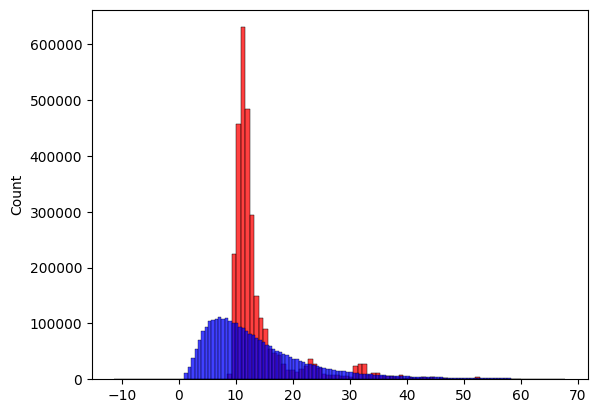

In [34]:
sns.histplot(y_pred, label='predicted', bins=100, color='red')
sns.histplot(y_train, label='actual', bins=100, color='blue')

In [41]:
root_mean_squared_error(y_train, y_pred)

7.65736363001657

Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

    3.81
    7.81
    11.81
    16.81


In [44]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [45]:
df_train = read_dataframe('data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('data/yellow_tripdata_2023-02.parquet')

In [46]:
dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [47]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred, squared=False)

/home/pvieira/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.820057137415617